In [1]:
import os
import tweepy
import pandas as pd
from dotenv import load_dotenv, find_dotenv

env_path = find_dotenv()
load_dotenv(env_path)
bearer_token = os.getenv('BEARER_TOKEN')

In [2]:
client = tweepy.Client(bearer_token=bearer_token)

In [3]:
query = '"iphone 7" lang:pt'
#['word', '"words"', 'word1 OR word2, '@mention', '#hashtag', 'to:account', 'since:year-month-day']
# queries can be 512 characters long

In [4]:
tweets = client.search_recent_tweets(query=query, 
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=10)

In [5]:
for tweet in tweets.data:
    print(tweet.text)
    print(f"Tweet id : {tweet.id}")
    print(f"Author id : {tweet.author_id}")
    print(f"Date : {tweet.created_at}")
    print(f"Source : {tweet.source}")
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags = []
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
            print(f"Hashtags : {hashtags}")
    print('------')

RT @qissofernanda: VENDO
iPhone 7 red 
128gb

RT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5
Tweet id : 1507357333936119815
Author id : 17833224
Date : 2022-03-25 14:02:48+00:00
Source : Twitter for iPhone
------
RT @qissofernanda: VENDO
iPhone 7 red 
128gb

RT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5
Tweet id : 1507356108867973123
Author id : 109674780
Date : 2022-03-25 13:57:56+00:00
Source : Twitter for iPhone
------
RT @qissofernanda: VENDO
iPhone 7 red 
128gb

RT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5
Tweet id : 1507354309767438344
Author id : 87988217
Date : 2022-03-25 13:50:47+00:00
Source : Twitter for iPhone
------
RT @CsMatao: Troca do flex home iPhone 7 (A1778).

Avenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - Matão/SP, fone (16)…
Tweet id : 1507350380312764419
Author id : 923310293110935553
Date : 2022-03-25 13:35:10+00:00
Source : broot do twitter
------
Troca do flex home iPhone 7 (A1778).

Avenida 15 de Novembro, 1182 - Centro, ao lado da Rua São L

In [6]:
def hashtag_list(tweet):
    hashtags = []
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
    return hashtags

In [7]:
tweets_search = [[],[],[],[],[]]
for tweet in tweets.data :
    tweets_search[0].append(tweet.text)
    tweets_search[1].append(tweet.author_id)
    tweets_search[2].append(tweet.created_at)
    tweets_search[3].append(tweet.source)
    tweets_search[4].append(hashtag_list(tweet))

In [8]:
tweets_search

[['RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'RT @CsMatao: Troca do flex home iPhone 7 (A1778).\n\nAvenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - Matão/SP, fone (16)…',
  'Troca do flex home iPhone 7 (A1778).\n\nAvenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - Matão/SP, fone (16)98832-8951.\n\nQuebrou seu smartphone? Sua TV não liga mais? Não consegue jogar seu game preferido? Venha para a Conserta Smart Matão. https://t.co/wvbcoPTDkY',
  'RT @CsMatao: Troca do flex home iPhone 7 (A1778).\n\nAvenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - Matão/SP, fone (16)…',
  'Troca do flex home iPhone 7 (A1778).\n\nAvenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - 

In [9]:
from thermofeeler.utils import preproc_func

In [10]:
preproc_tweets=[]
for tweet in tweets_search[0]:
    preproc_tweets.append(preproc_func(tweet))

In [11]:
preproc_tweets[0]

['vendo', 'iphone', 'red', 'gb', 'pfvr', 'amizades']

In [12]:
#for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
#                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
#    print(tweet)

In [13]:
from datetime import datetime, timedelta
def tweet_week(query):
    tweets_search = []
    now = datetime.now() + timedelta(hours=3)
    start_time = now - timedelta(days=7)
    end_time = now - timedelta(days=6)

    for loop in range(6):
        tweets = client.search_recent_tweets(query=query, 
                                         start_time=start_time,
                                         end_time=end_time,
                                         tweet_fields=['author_id','created_at','source','entities'],
                                         max_results=20)
        tweets_search.append(tweets)
        start_time += timedelta(days=1)
        end_time += timedelta(days=1)
    return tweets_search

In [14]:
tweets_search = tweet_week(query)

In [15]:
tweets_ = [[],[],[],[],[]]
for tweets in tweets_search:
    for tweet in tweets.data :
        tweets_[0].append(tweet.text)
        tweets_[1].append(tweet.author_id)
        tweets_[2].append(tweet.created_at)
        tweets_[3].append(tweet.source)
        tweets_[4].append(hashtag_list(tweet))

In [16]:
len(tweets_[0])

109

In [17]:
tweets_

[['RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsApp⬇️\nWhatsApp: (21) 996950290 #RuanCell\nhttps://t.co/sLzJTf4Fd7 https://t.co/vc8meDUkGI',
  'RT @babsdeavilaa: VENDO IPHONE 7 PLUS 128GB!! \n77% de bateria \nApenas tela trincada e áudio com defeito https://t.co/3WtoRjlFnC',
  'fone do iphone 7 eh um cu viu',
  'RT @rcjgsul: Vendo IPhone 7 Plus 256GB estado de novo sem riscos ou detalhes R$ 1.650,00 https://t.co/3UjXcZ8kZS',
  'Vendo IPhone 7 Plus 256GB estado de novo sem riscos ou detalhes R$ 1.650,00 https://t.co/3UjXcZ8kZS',
  'RT @anajuli28811267: Pq no iPhone 7 não tem os emoji novos???',
  '@reislucas04 2010 tá

In [18]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np
L = np.random.randint(-1,2,len(tweets_[0]))
L = L.tolist()

In [20]:
import seaborn as sns

In [21]:
df = pd.DataFrame(tweets_[2],L).reset_index()
df['date'] = df[0].dt.strftime("%d/%m/%Y")
df = df.drop(columns=[0])

In [22]:
df

,index,date
0,1,19/03/2022
1,-1,19/03/2022
2,0,19/03/2022
3,1,19/03/2022
4,1,19/03/2022
...,...,...
104,-1,24/03/2022
105,0,24/03/2022
106,0,24/03/2022
107,1,24/03/2022


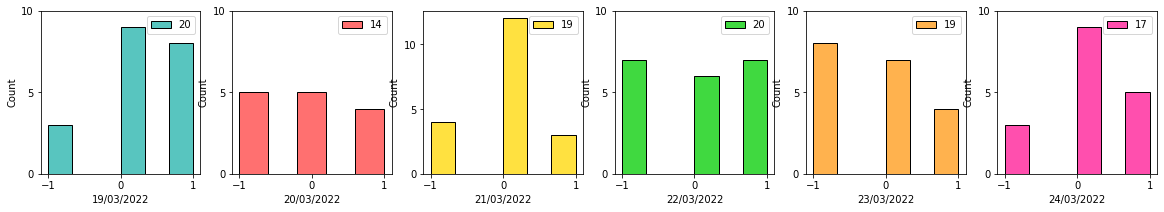

In [23]:
colors = ["#20B2AA","#FF4040","#FFD700","#00CD00","#FF9912", "#FF1493"]

plt.figure(figsize=(20,3))
for i,date,color in zip(range(7), sorted(df.date.unique()),colors):
    plt.subplot(1,6,i+1)
    sentiment_day = df[df['date'] == date]['index']
    sns.histplot(sentiment_day, color=color, label=df.date.value_counts()[date])
    plt.xticks([-1,0,1])
    plt.yticks([0,5,10])
    plt.xlabel(date)
    plt.legend();

In [24]:
from thermofeeler.twitter_api import twitter_request_week
from thermofeeler.utils import twitter_data_week

In [25]:
tweets_week = twitter_request_week(query)

In [26]:
tweets = twitter_data_week(tweets_week)

In [27]:
tweets

[['RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsApp⬇️\nWhatsApp: (21) 996950290 #RuanCell\nhttps://t.co/sLzJTf4Fd7 https://t.co/vc8meDUkGI',
  'RT @babsdeavilaa: VENDO IPHONE 7 PLUS 128GB!! \n77% de bateria \nApenas tela trincada e áudio com defeito https://t.co/3WtoRjlFnC',
  'fone do iphone 7 eh um cu viu',
  'RT @rcjgsul: Vendo IPhone 7 Plus 256GB estado de novo sem riscos ou detalhes R$ 1.650,00 https://t.co/3UjXcZ8kZS',
  'Vendo IPhone 7 Plus 256GB estado de novo sem riscos ou detalhes R$ 1.650,00 https://t.co/3UjXcZ8kZS',
  'RT @anajuli28811267: Pq no iPhone 7 não tem os emoji novos???',
  '@reislucas04 2010 tá

In [28]:
from thermofeeler.predict import predict_week

In [41]:
tweets_list, predict_list = predict_week(query)

Getting tweets...
Organizing tweets...
Preprocessing tweets...
Tokenzing tweets...
Predicting sentiments...


2022-03-25 11:32:58.300964: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25 11:32:58.311450: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25 11:32:58.584644: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25 11:32:58.654577: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25 11:32:58.664679: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_sh

Organizing data...


In [42]:
tweets_list

[['esses chineses tao tudo copiando o design dos iPhone e nem pra copiar o do mais recente pega iPhone 7 Plus',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsApp⬇️\nWhatsApp: (21) 996950290 #RuanCell\nhttps://t.co/sLzJTf4Fd7 https://t.co/vc8meDUkGI',
  'RT @babsdeavilaa: VENDO IPHONE 7 PLUS 128GB!! \n77% de bateria \nApenas tela trincada e áudio com defeito https://t.co/3WtoRjlFnC',
  'fone do iphone 7 eh um cu viu',
  'RT @rcjgsul: Vendo IPhone 7 Plus 256GB estado de novo sem riscos ou detalhes R$ 1.650,00 https://t.co/3UjXcZ8kZS',
  'Vendo IPhone 7 Plus 256GB estado de novo sem riscos ou detalhes R$ 1.650,00 http

In [43]:
for index, value in enumerate(predict_list):
    if value == 0:
        predict_list[index] = -1
    elif value == 1:
        predict_list[index] = 0
    elif value == 2:
        predict_list[index] = 1

predict_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 1,
 1,
 -1,
 1,
 1]

In [44]:
df = pd.DataFrame(tweets_list[2],predict_list).reset_index()
df['date'] = df[0].dt.strftime("%d/%m/%Y")
df = df.drop(columns=[0])

In [45]:
df

,index,date
0,1,19/03/2022
1,1,19/03/2022
2,1,19/03/2022
3,1,19/03/2022
4,1,19/03/2022
...,...,...
105,1,24/03/2022
106,1,24/03/2022
107,-1,24/03/2022
108,1,24/03/2022


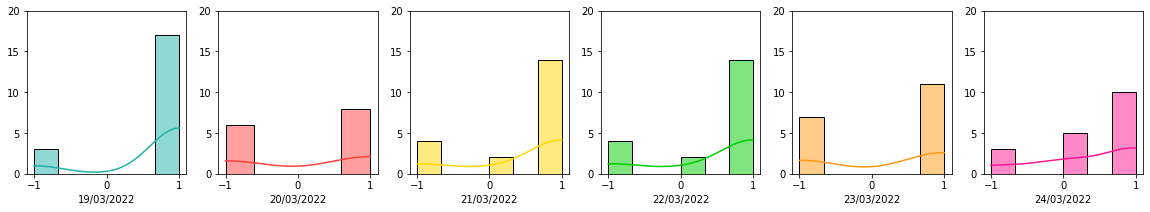

In [64]:
colors = ["#20B2AA","#FF4040","#FFD700","#00CD00","#FF9912", "#FF1493"]

plt.figure(figsize=(20,3))
for i,date,color in zip(range(7), sorted(df.date.unique()),colors):
    plt.subplot(1,6,i+1)
    sentiment_day = df[df['date'] == date]['index']
    sns.histplot(sentiment_day, color=color, kde=True)
    plt.ylabel('')
    plt.xlabel(date)
    plt.yticks([0,5,10,15,20])
    plt.xticks([-1,0,1]);